Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


<Figure size 800x600 with 0 Axes>

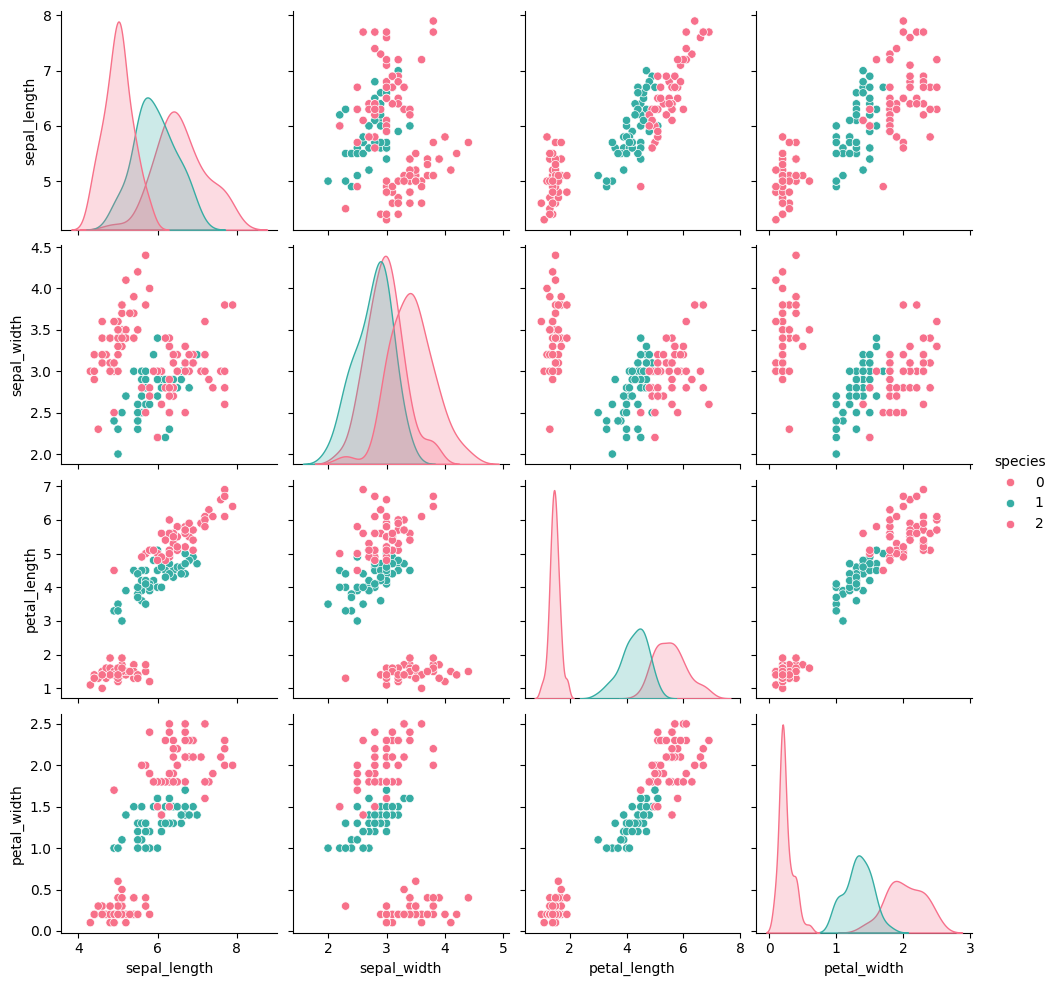

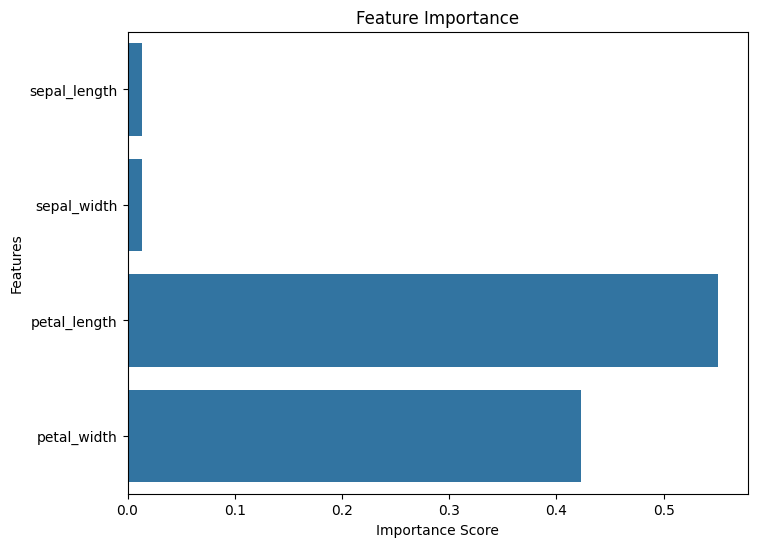

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



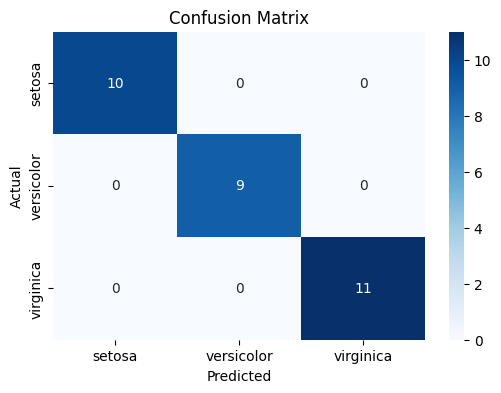

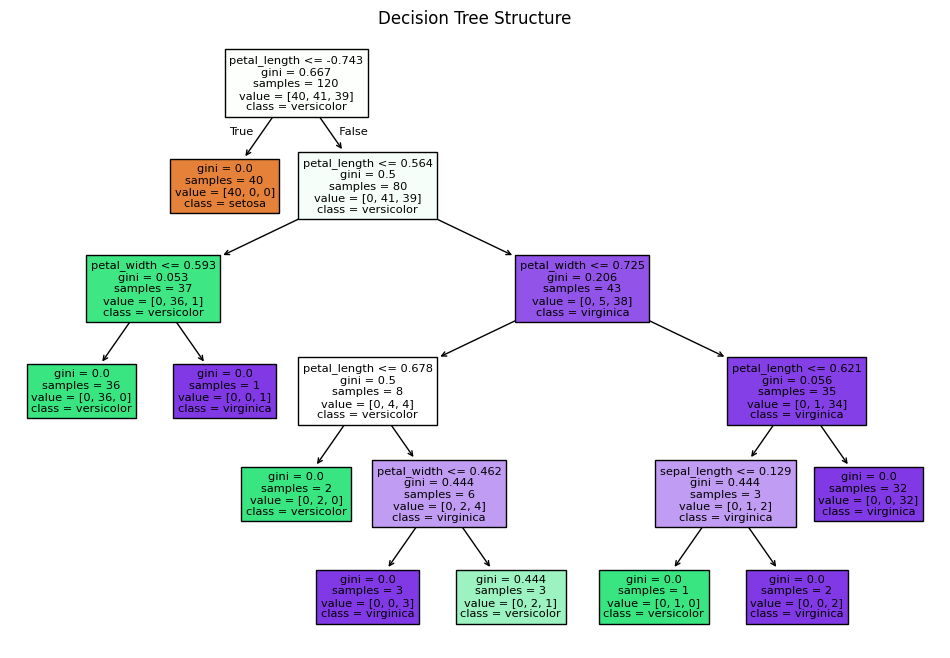

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the Iris Dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Step 3: Data Preprocessing
# Encode the target variable ('species')
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # Convert 'species' column to numerical values

# Step 4: Define Independent & Dependent Variables
X = df.drop(columns=['species'])  # Independent variables
y = df['species']  # Target variable (0, 1, 2 for three flower types)

# Step 5: Standardization of Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Data Exploration (Visualizations)
plt.figure(figsize=(8, 6))
sns.pairplot(df, hue="species", palette="husl")
plt.show()

# Step 7: Feature Importance using Decision Tree
model = DecisionTreeClassifier()
model.fit(X_scaled, y)
feature_importance = model.feature_importances_

# Plot Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

# Step 8: Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 9: Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

# Step 10: Predictions
y_pred = dt_classifier.predict(X_test)

# Step 11: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 12: Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree Structure")
plt.show()
